# Data Preprocessing


##### Downloading dataset


In [94]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

In [2]:
od.download(
    'https://www.kaggle.com/datasets/shariful07/student-mental-health/data')

Skipping, found downloaded files in ".\student-mental-health" (use force=True to force download)


In [95]:
dataset = pd.read_csv("student-mental-health\\Student Mental health.csv")
dataset.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [96]:
dataset = dataset.drop("Timestamp", axis=1)
dataset = dataset.drop("Did you seek any specialist for a treatment?", axis=1)

In [97]:
# Renaming columns
dataset.rename(columns={'Choose your gender': 'Gender', 'What is your course?': 'Course', 'Your current year of Study': 'Study Year', 'What is your CGPA?': 'CGPA', 'Marital status': 'Marital Status',
               'Do you have Depression?': 'Depression', 'What is your course?': 'Course', 'Do you have Anxiety?': 'Anxiety', 'Do you have Panic attack?': 'Panic Attack'}, inplace=True)

In [98]:
# Sample DataFrame
data = pd.read_csv("Processed Data.csv")
dataset["Course"] = data['Course']
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack
0,Female,18.0,5,year 1,3.00 - 3.49,No,Yes,No,Yes
1,Male,21.0,10,year 2,3.00 - 3.49,No,No,Yes,No
2,Male,19.0,4,Year 1,3.00 - 3.49,No,Yes,Yes,Yes
3,Female,22.0,8,year 3,3.00 - 3.49,Yes,Yes,No,No
4,Male,23.0,9,year 4,3.00 - 3.49,No,No,No,No


In [99]:
mapping = {
    0: 'Agriculture and Environmental Studies',
    1: 'Arts and Humanities',
    2: 'Business and Economics',
    3: 'Communication and Media',
    4: 'Computer and Information Sciences',
    5: 'Engineering and Technology',
    6: 'Health Sciences',
    7: 'Interdisciplinary Studies',
    8: 'Law',
    9: 'Mathematics and Statistics',
    10: 'Religious Studies',
    11: 'Social Sciences'
}

# Replace integers with corresponding strings
dataset['Course'] = data['Course'].map(mapping)


In [100]:
# Processing age column
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)
# Round the mean value to the nearest integer (optional)
mean_age = round(mean_age)
# Convert the 'Age' column to integers
dataset['Age'] = dataset['Age'].astype(int)

# Filling empty cells with value "Female"
dataset['Gender'].fillna('Female', inplace=True)

# Convert 'Study Year' and 'CGPA' to lowercase and strip leading and trailing spaces
dataset['Study Year'] = dataset['Study Year'].str.lower().str.strip().str.replace(" ", "")
dataset['CGPA'] = dataset['CGPA'].str.lower().str.strip().str.replace(" ", "")


In [101]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack
0,Female,18,Engineering and Technology,year1,3.00-3.49,No,Yes,No,Yes
1,Male,21,Religious Studies,year2,3.00-3.49,No,No,Yes,No
2,Male,19,Computer and Information Sciences,year1,3.00-3.49,No,Yes,Yes,Yes
3,Female,22,Law,year3,3.00-3.49,Yes,Yes,No,No
4,Male,23,Mathematics and Statistics,year4,3.00-3.49,No,No,No,No


In [59]:
import plotly.express as px

# Calculate value counts
value_counts = dataset['Age'].value_counts()
value_counts2 = dataset['Study Year'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(names=value_counts.index, values=value_counts.values,
             title='Pie Chart based on age count')
fig2 = px.pie(names=value_counts2.index, values=value_counts2.values,
              title='Pie Chart based on study year count')

# Show the plot
fig.show()
fig2.show()

In [32]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

#dataset.sort_values(by="CGPA", inplace=True)
plt.figure(dpi=200)
fig = px.bar(dataset, x="Age", y="Course",
             orientation='h', color='CGPA')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [33]:
# dataset.sort_values(by="Study Year", inplace=True)

x = dataset["Age"]

fig = go.Figure()

# Create and style traces

fig.add_trace(go.Scatter(x=x, y=dataset["Depression"], name='Depression', line=dict(
    color='firebrick', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Panic Attack"], name='Panic Attack', line=dict(
    color='royalblue', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Anxiety"], name='Anxiety', line=dict(
    color='black', width=4, dash='dashdot')))


# Edit the layout

fig.update_layout(title='Depressive symptoms across ages',
                  xaxis_title='Age Groups', yaxis_title='Types of issue')


fig.show()

In [34]:
x = dataset["Age"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=dataset["Depression"],
                         name='Depression',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='Depression across ages',
                   xaxis_title='Age',
                   yaxis_title='Depression')


fig.show()

In [ ]:
import seaborn as sns

Corrmat = dataset.corr()
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

- **Key Finding:** The analysis reveals a higher prevalence of depression among students pursuing computer-related degrees compared to other disciplines.

- **Age Group Impact:** Students in the midst of their degree, specifically at the age of 19-20, exhibit a higher likelihood of experiencing depression compared to other age groups.

- **Discipline Comparison:**

  - _Computer-related Degrees:_ Highest reported depression rates.
  - _Engineering and Technology Degrees:_ Second-highest depression rates.

- **Temporal Patterns in Engineering and Technology Courses:**
  - _Start of Degrees:_ Engineering and technology students show an increased likelihood of depression at the beginning of their academic journey.
  - _End of Degrees:_ Similarly, a notable prevalence of depression is observed towards the completion of their degrees.


# Getting Data ready for deep learning

In [139]:

X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -3:-1].values

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
Female: 0
Male: 1


In [141]:
print(X)

[[0 18 'Engineering and Technology' 'year1' '3.00-3.49' 'No' 'Yes']
 [1 21 'Religious Studies' 'year2' '3.00-3.49' 'No' 'No']
 [1 19 'Computer and Information Sciences' 'year1' '3.00-3.49' 'No' 'Yes']
 [0 22 'Law' 'year3' '3.00-3.49' 'Yes' 'Yes']
 [1 23 'Mathematics and Statistics' 'year4' '3.00-3.49' 'No' 'No']
 [1 19 'Engineering and Technology' 'year2' '3.50-4.00' 'No' 'No']
 [0 23 'Religious Studies' 'year2' '3.50-4.00' 'Yes' 'Yes']
 [0 18 'Computer and Information Sciences' 'year1' '3.50-4.00' 'No' 'No']
 [0 19 'Business and Economics' 'year2' '2.50-2.99' 'No' 'No']
 [1 18 'Interdisciplinary Studies' 'year1' '3.50-4.00' 'No' 'No']
 [0 20 'Social Sciences' 'year1' '3.50-4.00' 'No' 'No']
 [0 24 'Engineering and Technology' 'year3' '3.50-4.00' 'Yes' 'Yes']
 [0 18 'Computer and Information Sciences' 'year1' '3.00-3.49' 'No' 'Yes']
 [1 19 'Engineering and Technology' 'year1' '3.00-3.49' 'No' 'No']
 [0 18 'Engineering and Technology' 'year2' '3.50-4.00' 'No' 'No']
 [1 24 'Computer and I

In [33]:
# Processing course column

import openai
import time

# Set your OpenAI GPT-3 API key
openai.api_key = ''


def categorize_course_with_gpt3(course):
    # Construct a prompt for GPT-3 to perform a web search
    prompt = f"Select the field of this course {course} from these given fields. Do not reply anything else than the given feilds. Reply only the strings of field:\n" \
             "Arts and Humanities\n" \
             "Social Sciences\n" \
             "Natural Sciences\n" \
             "Engineering and Technology\n" \
             "Health Sciences\n" \
             "Business and Economics\n" \
             "Law\n" \
             "Religious Studies\n" \
             "Agriculture and Environmental Studies\n" \
             "Interdisciplinary Studies\n" \
             "Communication and Media\n" \
             "Computer and Information Sciences\n" \
             "Physical Education and Sports Sciences\n" \
             "Mathematics and Statistics\n" \
             "Public Policy and Administration\n" \
             "Interdisciplinary and General Education\n"

    # Make an API call to GPT-3 using the chat completion endpoint
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150  # Adjust as needed
    )
    return response["choices"][0]["message"]["content"]


# Set the rate limit variables
requests_limit = 3
wait_time = 60

# Iterate over the DataFrame and update values
for index, row in dataset.iterrows():
    current_value = row['Course']
    if pd.notna(current_value):
        updated_value = categorize_course_with_gpt3(current_value)
        dataset.at[index, 'Course'] = updated_value
        print(updated_value)
    else:
        dataset.at[index, 'Course'] = "General Studies"
        print("General Studies")

    # Check if 3 requests have been made and introduce a wait
    if (index + 1) % requests_limit == 0 and index != 0:
        print(f"Waiting for {wait_time} seconds...")
        time.sleep(wait_time)

Engineering and Technology
Religious Studies
Computer and Information Sciences
Waiting for 60 seconds...
Law
Mathematics and Statistics
Engineering and Technology
Waiting for 60 seconds...
Religious Studies
Computer and Information Sciences
Business and Economics
Waiting for 60 seconds...
Interdisciplinary Studies
Social Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Engineering and Technology
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Agriculture and Environmental Studies
Engineering and Technology
Waiting for 60 seconds...
Communication and Media
Computer and Information Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Engineering and Technology
Computer and Infor

In [142]:
unique_strings = np.unique(X[:, 2]).tolist()

print(unique_strings)

['Agriculture and Environmental Studies', 'Arts and Humanities', 'Business and Economics', 'Communication and Media', 'Computer and Information Sciences', 'Engineering and Technology', 'Health Sciences', 'Interdisciplinary Studies', 'Law', 'Mathematics and Statistics', 'Religious Studies', 'Social Sciences']


| Category                              | One-Hot Encoding                           |
|---------------------------------------|--------------------------------------------|
| Agriculture and Environmental Studies | [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Arts and Humanities                   | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Business and Economics                | [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Communication and Media              | [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Computer and Information Sciences     | [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      |
| Engineering and Technology            | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]      |
| Health Sciences                       | [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]      |
| Interdisciplinary Studies             | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]      |
| Law                                   | [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]      |
| Mathematics and Statistics            | [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]      |
| Religious Studies                     | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]      |
| Social Sciences                       | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]      |


In [143]:
#Applying One Hot encoding on Course Column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [144]:
np.set_printoptions(threshold=np.inf)
print(X)

[[0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18 'year1'
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1 21 'year2'
  '3.00-3.49' 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19 'year1'
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0 22 'year3'
  '3.00-3.49' 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1 23 'year4'
  '3.00-3.49' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19 'year2'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0 23 'year2'
  '3.50-4.00' 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 19 'year2'
  '2.50-2.99' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 18 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0 20 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 1.0 

In [145]:
unique_strings = np.unique(X[:, 14]).tolist()

print(unique_strings)

['year1', 'year2', 'year3', 'year4']


| Year   | One-Hot Encoding                  |
|--------|-----------------------------------|
| year1  | [1, 0, 0, 0]                      |
| year2  | [0, 1, 0, 0]                      |
| year3  | [0, 0, 1, 0]                      |
| year4  | [0, 0, 0, 1]                      |


In [146]:
#Applying One Hot encoding on Course Column

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [14])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [147]:
print(X)

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18
  '3.00-3.49' 'No' 'Yes']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1 21
  '3.00-3.49' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0 22
  '3.00-3.49' 'Yes' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1 23
  '3.00-3.49' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19
  '3.50-4.00' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0 23
  '3.50-4.00' 'Yes' 'Yes']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18
  '3.50-4.00' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 19
  '2.50-2.99' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 18
  '3.50-4.00' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [148]:
unique_strings = np.unique(X[:, -3]).tolist()

print(unique_strings)

['0-1.99', '2.00-2.49', '2.50-2.99', '3.00-3.49', '3.50-4.00']


In [149]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

| Grade Range | One-Hot Encoding                  |
|-------------|-----------------------------------|
| 0-1.99      | [1, 0, 0, 0, 0]                  |
| 2.00-2.49   | [0, 1, 0, 0, 0]                  |
| 2.50-2.99   | [0, 0, 1, 0, 0]                  |
| 3.00-3.49   | [0, 0, 0, 1, 0]                  |
| 3.50-4.00   | [0, 0, 0, 0, 1]                  |


In [150]:
print(X)

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 'No' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 1 21 'No' 'No']
 [0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 'No' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0 22 'Yes' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 1 23 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0 23 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 'No' 'No']
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 19 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [151]:
# Label encoding for martial status 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -2] = le.fit_transform(X[:, -2])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [152]:
# Label encoding for depression

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:, -1])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [153]:
print(X)

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 1 21 0 0]
 [0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0 22 1 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 1 23 0 0]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 0 0]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0 23 1 1]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 0 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 19 0 0]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 0.0 0.0 1 18 0 0]
 [0.0 0.0 0.0 0.0 1.

In [ ]:
# Label encoding for Anxiety

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y[:, 0] = le.fit_transform(y[:, 0])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

In [ ]:
# Label encoding for depression

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:, -1])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

In [159]:
# Label encoding for Anxiety

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y[:, 0] = le.fit_transform(y[:, 0])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [160]:
# Label encoding for Panic Attack

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y[:, 1] = le.fit_transform(y[:, 1])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


### Splitting the dataset into the Training set and Test set

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing ANN

In [77]:
import tensorflow as tf

In [89]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "c:\Users\saif_\miniconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\saif_\miniconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\saif_\miniconda3\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\saif_\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\saif_\miniconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\saif_\miniconda3\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\saif_\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\saif_\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\saif_\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\saif_\AppData\Local\Temp\ipykernel_24560\2001876297.py", line 11, in <module>
      history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\saif_\miniconda3\lib\site-packages\keras\losses.py", line 2151, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_5071]

In [ ]:
'''#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
ann = Sequential()

# layers

ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
ann.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = ann.fit(X_train, y_train, batch_size = 10, epochs = 150, callbacks=[early_stopping], validation_split=0.2)'''

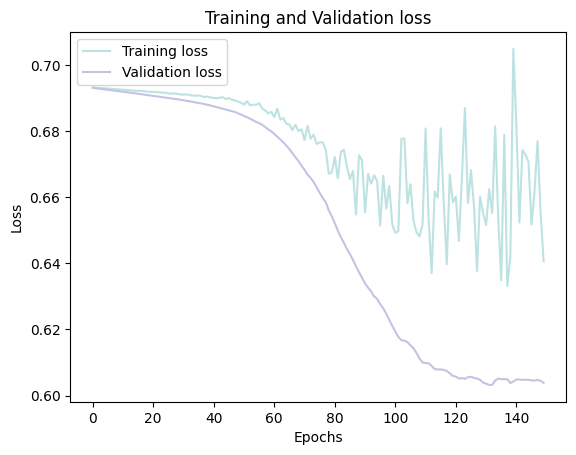

In [21]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [3]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'pd' is not defined

In [2]:
import numpy as np

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

NameError: name 'ann' is not defined

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [22]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  3]
 [ 2  3]]


0.7619047619047619

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.50 %
Standard Deviation: 13.46 %


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0]
 [ 2  3]]


0.9047619047619048

C:\Users\saif_\AppData\Local\Temp\ipykernel_4972\2993250469.py:12: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



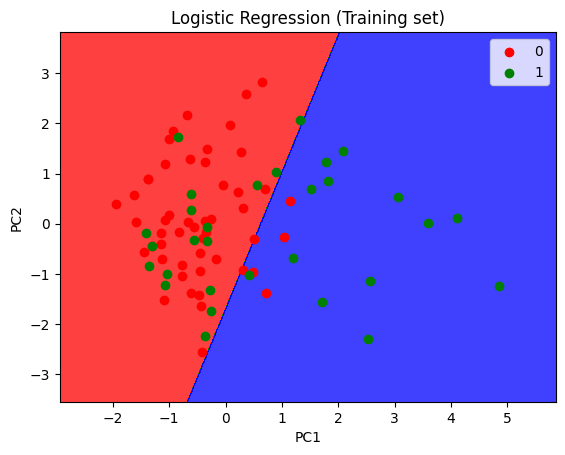

In [28]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\saif_\AppData\Local\Temp\ipykernel_4972\3946207957.py:10: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



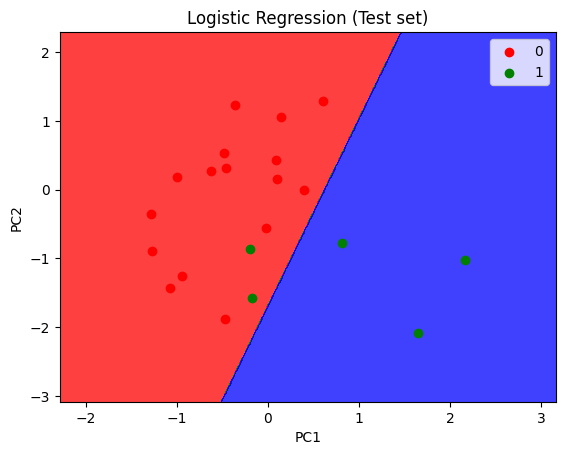

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()